## `pandas`

For many datasets that we want to access in simple text formats, we can use specialised packages such as [`pandas`](https://pandas.pydata.org/). This is designed for data analysis and manipulation, and so (mostly) makes it easy for the user to read such data.


In [1]:
import pandas as pd
import io
url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"

c=pd.read_csv('https://raw.githubusercontent.com/UCL-EO/geog0111/master/data/2276931.csv')
c

,STATION,NAME,DATE,PRCP,SNOW
0,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-01,0.00,0.0
1,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-02,0.00,0.0
2,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-03,0.00,0.0
3,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-04,0.98,NaN
4,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-05,0.00,0.0
...,...,...,...,...,...
240,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-08-29,0.39,NaN
241,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-08-30,0.12,NaN
242,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-08-31,0.06,NaN
243,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-09-01,0.44,NaN


Text(0, 0.5, 'PRCP')

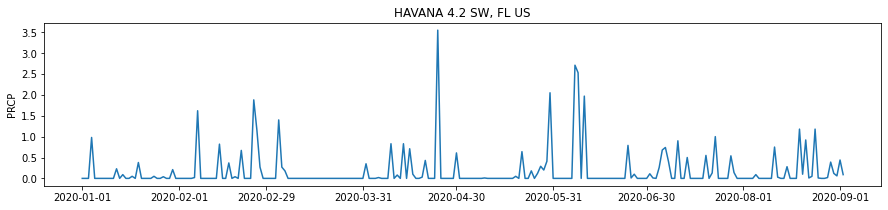

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# choose the item to plot
quantity = 'PRCP'

# generate figure an plot
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(c['DATE'],c[quantity])

# format the ticks: every month
months = mdates.MonthLocator() 
ax.xaxis.set_major_locator(months)

plt.title(c['NAME'][0])
plt.ylabel(quantity)

In [3]:
from geog0111.gurlpath import URL
url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"

f = URL(url)

If we examine the data on the website [HadSEEP_monthly_qc.txt](https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt), we see that the first 3 lines are metedata. The fourth line specifies the data columns, then the rest are datra values, with `-99.9` as invalid.



In [4]:
from geog0111.gurlpath import URL
import io

url = "https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt"
f = URL(url)

text_data = f.read_text()


We could do some processing and manipulation of the text data string. For example the following code will split the string on newline `\n` characters into a list, take the first 6 lines of the list, then join it back again into a string:

    '\n'.join(text_data.split('\n')[:6])

In [5]:
print(f'data read is {len(text_data)} bytes of text data')
print('\n'.join(text_data.split('\n')[:6]))

data read is 12915 bytes of text data
Monthly Southeast England precipitation (mm). Daily automated values used after 1996.
Wigley & Jones (J.Climatol.,1987), Gregory et al. (Int.J.Clim.,1991)
Jones & Conway (Int.J.Climatol.,1997), Alexander & Jones (ASL,2001). Values may change after QC.
YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC   ANN
 1873  87.1  50.4  52.9  19.9  41.1  63.6  53.2  56.4  62.0  86.0  59.4  15.7  647.7
 1874  46.8  44.9  15.8  48.4  24.1  49.9  28.3  43.6  79.4  96.1  63.9  52.3  593.5


This is effective, but normally we would use specialised packages designed for reading tabular data of this sort. 


In [6]:
import pandas as pd
import io
c=pd.read_table(io.StringIO(f.read_text()),skiprows=3,na_values=[-99.9],sep=r"[ ]{1,}",engine='python')
c.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,1873,87.1,50.4,52.9,19.9,41.1,63.6,53.2,56.4,62.0,86.0,59.4,15.7,647.7
1,1874,46.8,44.9,15.8,48.4,24.1,49.9,28.3,43.6,79.4,96.1,63.9,52.3,593.5
2,1875,96.9,39.7,22.9,37.0,39.1,76.1,125.1,40.8,54.7,137.7,106.4,27.1,803.5
3,1876,31.8,71.9,79.5,63.6,16.5,37.2,22.3,66.3,118.2,34.1,89.0,162.9,793.3
4,1877,146.0,47.7,56.2,66.4,62.3,24.9,78.5,82.4,38.4,58.1,144.5,54.2,859.6


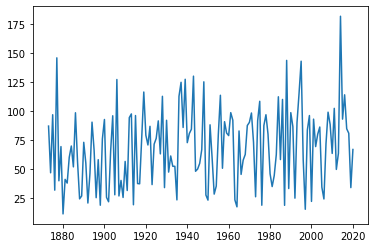

In [7]:
import matplotlib.pyplot as plt
plt.plot(c['YEAR'],c['JAN'])